# 0. Readme

这个文件包含了整个数理统计数据分析的流程。运行这个文件，将得到所有的结果。

In [1]:
import sys
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置英文字体
plt.rcParams['font.family'] = ['SimSun', 'Times New Roman']
plt.rcParams['font.size'] = 10.5  # 设置字体大小

# 设置中文字体
fontproperties = FontProperties(fname='C:\\Windows\\Fonts\\simsun.ttc')

# 配色
color_red = (219 / 255, 49 / 255, 36 / 255)
color_orange = (252 / 255, 140 / 255, 90 / 255)
color_yellow = (255 / 255, 223 / 255, 146 / 255)
color_gray = (230 / 255, 241 / 255, 243 / 255)
color_light_blue = (144 / 255, 190 / 255, 224 / 255)
color_dark_blue = (75 / 255, 116 / 255, 178 / 255)

# 将项目主文件夹加入到环境变量，方便导入src的内容
sys.path.append("..")

# 1. 数据读取和预处理

读取收集到的csv数据，会发现其中的 **urban_population_rate** 一列缺少两个数据，于是需要对数据进行处理。

预处理时采用插值法补全数据。

In [2]:
import os
import pandas as pd

proj_dir = os.path.abspath("..")
data_path = os.path.join(proj_dir, "data", "data.csv")
save_path = os.path.join(proj_dir, "reports")

# 读取数据并预处理
from src.data_preprocess import read_population_data, do_standardize, inverse_standardize
df = read_population_data(data_path)

mapping = {
    0: "population",
    1: "urban_population_rate",
    2: "gdp_per_capita",
    3: "unemployment_rate",
}

df

,population,urban_population_rate,gdp_per_capita,unemployment_rate
year,,,,
2001,2829.00,34.710000,5655.0,3.90
2002,2814.00,36.400000,6353.0,4.10
2003,2803.00,39.333333,8075.0,4.10
2004,2793.00,42.266667,9608.0,4.10
2005,2798.00,45.200000,10978.0,4.10
2006,2808.00,46.700000,12437.0,4.00
2007,2816.00,48.300000,14622.0,3.90
2008,2839.00,49.990000,20490.0,3.96
2009,2859.00,51.590000,22920.0,3.96


In [40]:
# 进行数据标准化
from sklearn.preprocessing import StandardScaler
# 创建一个标准化器
std_scaler = StandardScaler()

std_df = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns, index=df.index)
std_df.to_csv(os.path.join(proj_dir, "data", "std_data.csv"))
std_df

,population,urban_population_rate,gdp_per_capita,unemployment_rate
year,,,,
2001,-0.973606,-1.871920,-1.253572,0.098822
2002,-1.067028,-1.722288,-1.229586,0.405970
2003,-1.135538,-1.462572,-1.170412,0.405970
2004,-1.197819,-1.202856,-1.117732,0.405970
2005,-1.166679,-0.943139,-1.070654,0.405970
2006,-1.104397,-0.810330,-1.020517,0.252396
2007,-1.054572,-0.668667,-0.945433,0.098822
2008,-0.911324,-0.519035,-0.743786,0.190966
2009,-0.786761,-0.377371,-0.660282,0.190966


In [4]:
# 保存描述性统计分析表
print(df.quantile())
df.describe().to_csv(os.path.join(save_path, 'df_describe.csv'))


print(std_df.quantile())
std_df.describe().to_csv(os.path.join(save_path, 'std_df_describe.csv'))


population                2945.00
urban_population_rate       56.98
gdp_per_capita           38914.00
unemployment_rate            3.90
Name: 0.5, dtype: float64
population              -0.251139
urban_population_rate    0.099857
gdp_per_capita          -0.110669
unemployment_rate        0.098822
Name: 0.5, dtype: float64


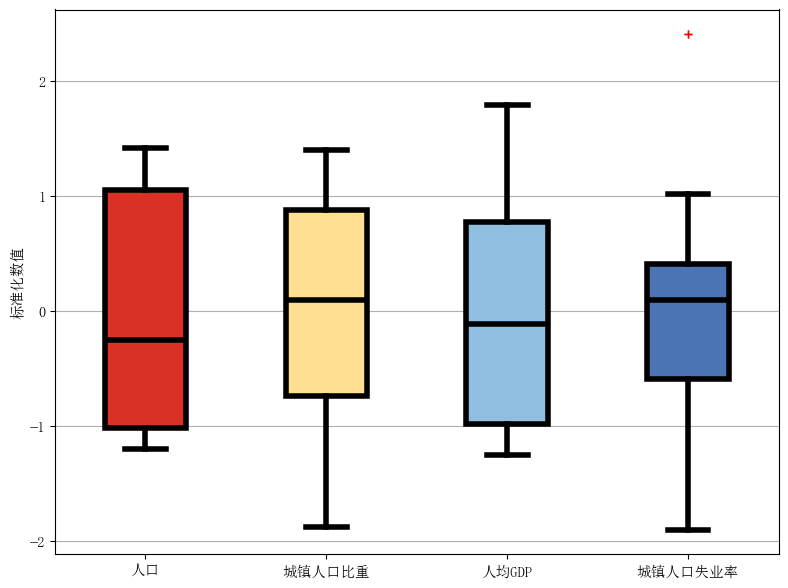

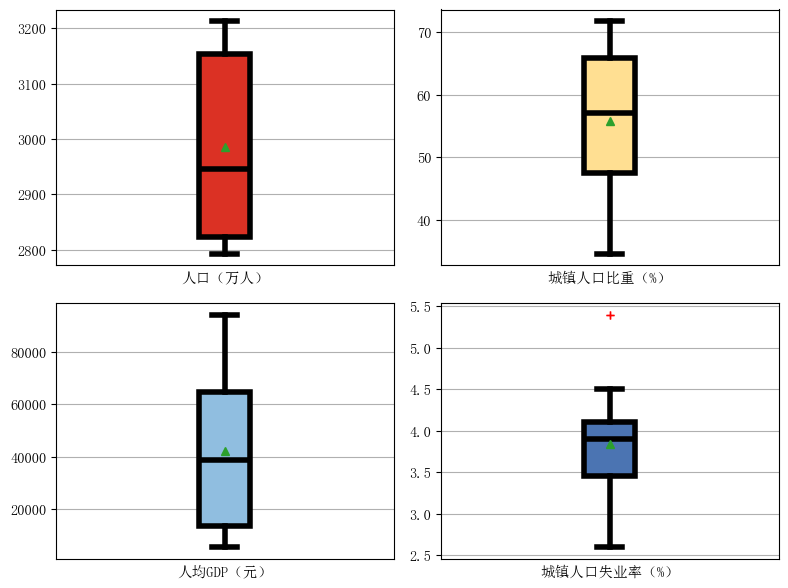

In [5]:
# 描述性统计分析

# 标准化后的盒图
colors = [color_red, color_yellow, color_light_blue, color_dark_blue]

fig, ax = plt.subplots(figsize=(8, 6))

bplot = ax.boxplot(std_df, vert=True, patch_artist=True,
                       boxprops=dict(linestyle='-', linewidth=4, color='k'),
                       flierprops=dict(linestyle='-', linewidth=4, color='k'),
                       medianprops=dict(linestyle='-', linewidth=4, color='k'),
                       whiskerprops=dict(linestyle='-', linewidth=4, color='k'),
                       capprops=dict(linestyle='-', linewidth=4, color='k'),
                       sym='r+')

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.yaxis.grid(True)
ax.set_ylabel("标准化数值")

plt.setp(ax, xticks=[1, 2, 3, 4],
         xticklabels=['人口', '城镇人口比重', '人均GDP', '城镇人口失业率'])
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'std_df_box.png'), dpi=600)
plt.show()



# 原始带量纲的盒图
xlabel = ["人口（万人）", "城镇人口比重（%）", "人均GDP（元）", "城镇人口失业率（%）",]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axs.flatten()):
    bplot = ax.boxplot(df[mapping[i]], vert=True, patch_artist=True,
                       boxprops=dict(linestyle='-', linewidth=4, color='k'),
                       flierprops=dict(linestyle='-', linewidth=4, color='k'),
                       medianprops=dict(linestyle='-', linewidth=4, color='k'),
                       whiskerprops=dict(linestyle='-', linewidth=4, color='k'),
                       capprops=dict(linestyle='-', linewidth=4, color='k'),
                       sym='r+', showmeans=True, )
    bplot['boxes'][0].set_facecolor(colors[i])
    ax.yaxis.grid(True)
    ax.set_xlabel(xlabel[i])
    ax.set_xticks([])
    
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'df_box.png'), dpi=600)
plt.show()

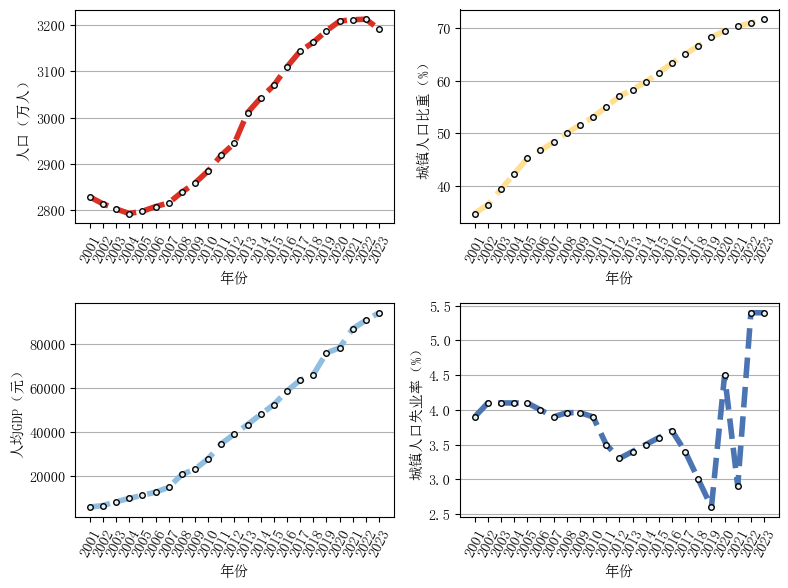

In [6]:
mapping = {
    0: "population",
    1: "urban_population_rate",
    2: "gdp_per_capita",
    3: "unemployment_rate",
}

chinese = {
    0: "人口（万人）",
    1: "城镇人口比重（%）",
    2: "人均GDP（元）",
    3: "城镇人口失业率（%）",
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
for i, ax in enumerate(axs.flatten()):
    ax.plot(df.index, df[mapping[i]], '--o', linewidth=4, color=colors[i], ms=4, markerfacecolor=color_gray, markeredgecolor='k')
    ax.yaxis.grid(True)
    ax.tick_params(axis='x', labelrotation=62)
    ax.set_xlabel('年份', fontproperties=fontproperties)
    ax.set_ylabel(chinese[i])

plt.tight_layout()
plt.savefig(os.path.join(save_path, 'df_line_chart.png'), dpi=600)
plt.show()
    

# 2. 回归分析

In [66]:
from src.regression import regression, write_results
ols_df = df.copy(deep=True)
ols_df.reset_index(inplace=True)

ols_df['urban_population_rate'] = ols_df.shift(1)['urban_population_rate']
ols_df['gdp_per_capita'] = ols_df.shift(1)['gdp_per_capita']
ols_df['unemployment_rate'] = ols_df.shift(1)['unemployment_rate']

ols_df.year = ols_df.year.astype(int)

year_list = ols_df['year'].unique()

ols_df = ols_df.reindex(columns=['population', 'urban_population_rate', 'gdp_per_capita', 'unemployment_rate', 'year'])

ols_scaler = StandardScaler()
ols_df = pd.DataFrame(ols_scaler.fit_transform(ols_df), columns=ols_df.columns, index=ols_df.index)

ols_df['prev_population'] = ols_df.shift(1)['population']

ols_df.to_csv(os.path.join(save_path, 'ols_df.csv'), index=False)

print(ols_df.head())
print(year_list)

ols_df = ols_df[1:]

year_list = year_list[1:]

   population  urban_population_rate  gdp_per_capita  unemployment_rate  \
0   -0.973606                    NaN             NaN                NaN   
1   -1.067028              -1.853046       -1.240101           0.236883   
2   -1.135538              -1.699708       -1.214729           0.586643   
3   -1.197819              -1.433560       -1.152134           0.586643   
4   -1.166679              -1.167411       -1.096410           0.586643   

       year  prev_population  
0 -1.658312              NaN  
1 -1.507557        -0.973606  
2 -1.356801        -1.067028  
3 -1.206045        -1.135538  
4 -1.055290        -1.197819  
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023]


## 2.1 一元线性回归分析

In [8]:
settings = [
    ['population', 'urban_population_rate'],
    ['population', 'gdp_per_capita'],
    ['population', 'unemployment_rate'],
    ['population', 'year'],
    ['population', 'prev_population'],
    ['population', 'urban_population_rate', 'gdp_per_capita', 'unemployment_rate'],
    ['population', 'urban_population_rate', 'gdp_per_capita', 'unemployment_rate', 'year'],
    ['population', 'urban_population_rate', 'gdp_per_capita', 'unemployment_rate', 'prev_population'],
    ['population', 'urban_population_rate', 'gdp_per_capita', 'unemployment_rate', 'year', 'prev_population'],
]

models = []

for i in range(len(settings)):
    model = regression(ols_df, *settings[i])
    models.append(model)
    write_results(model, ols_df['population'], os.path.join(save_path, f'model{i + 1}_summary.csv'))



## 2.2 基于上面的结果画图

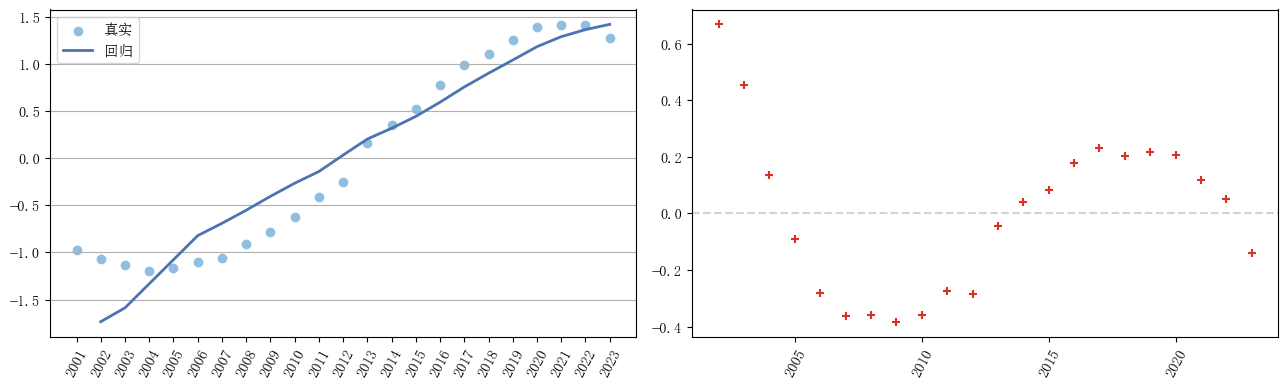

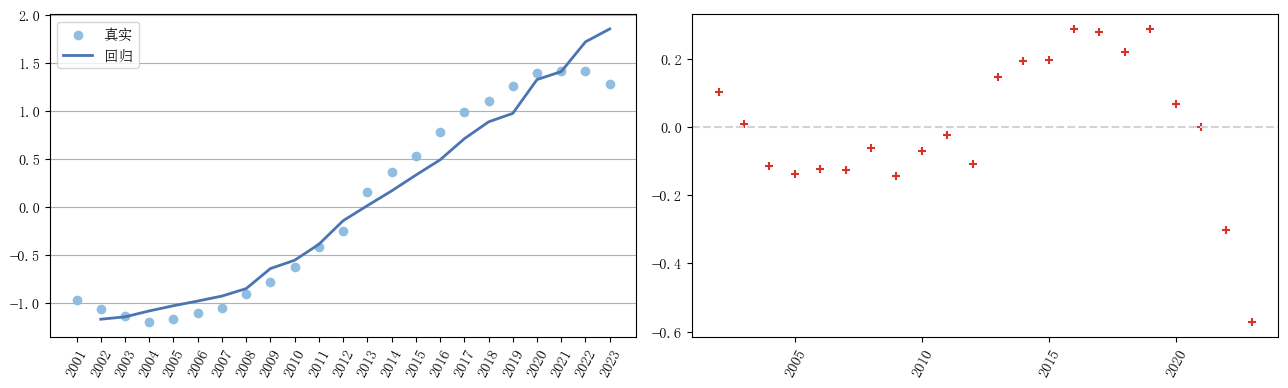

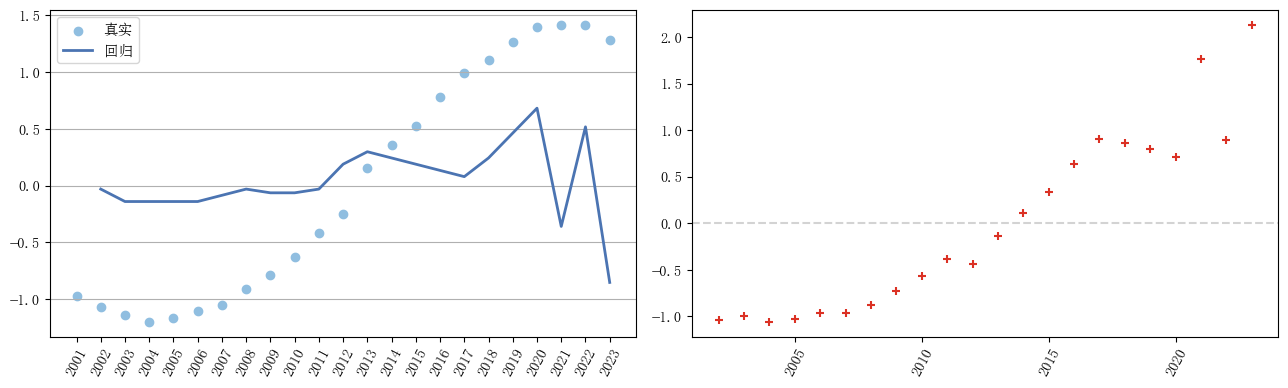

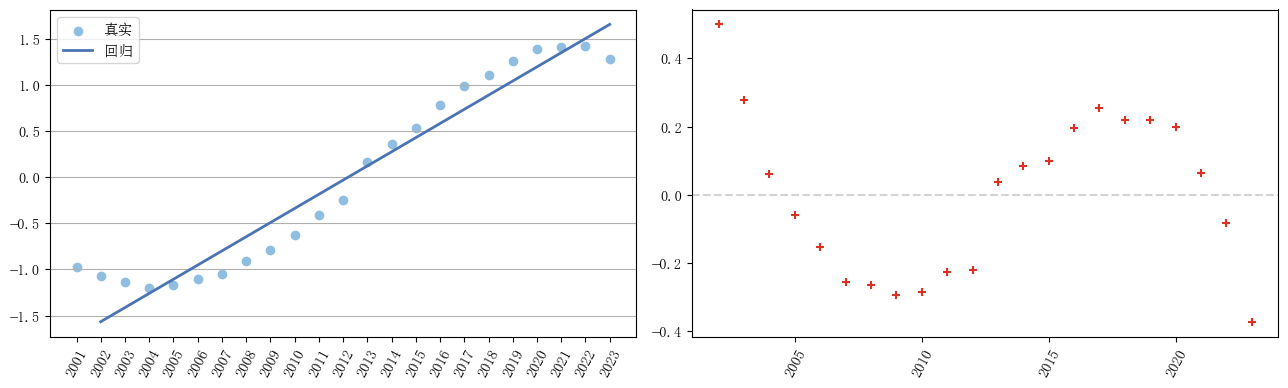

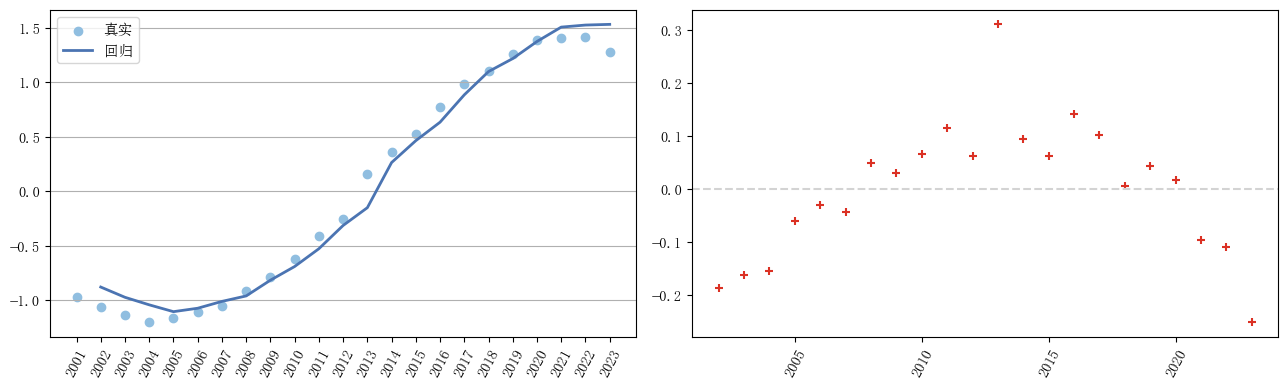

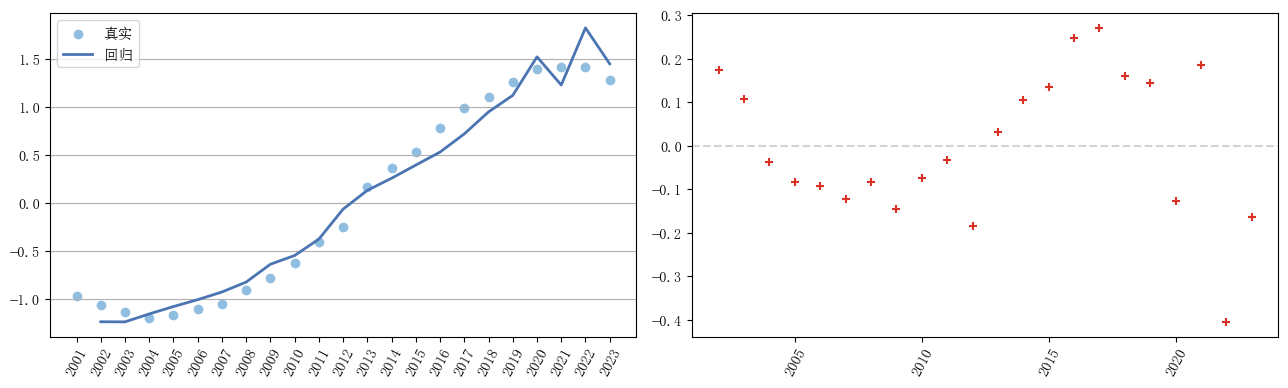

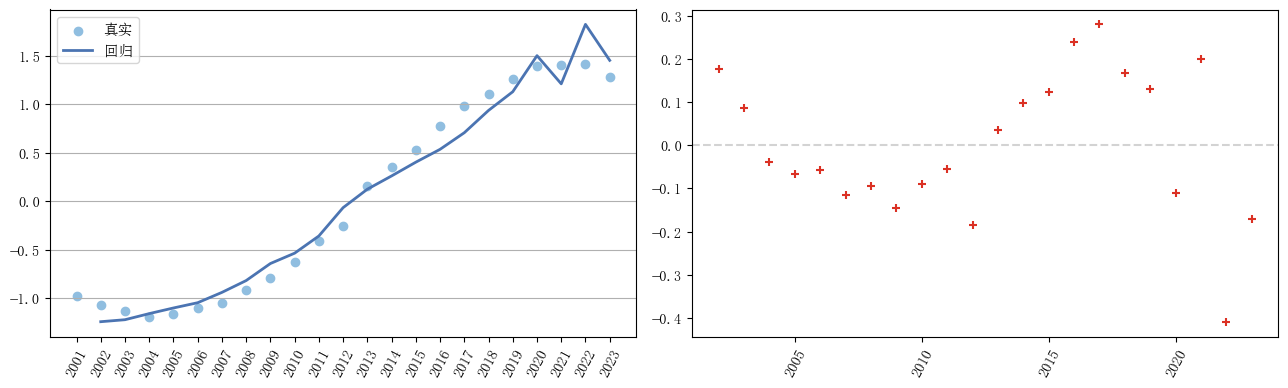

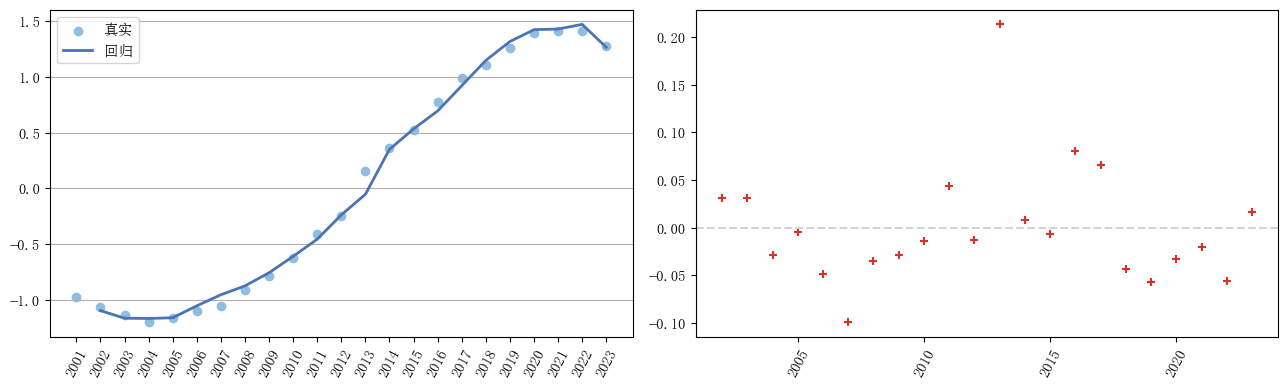

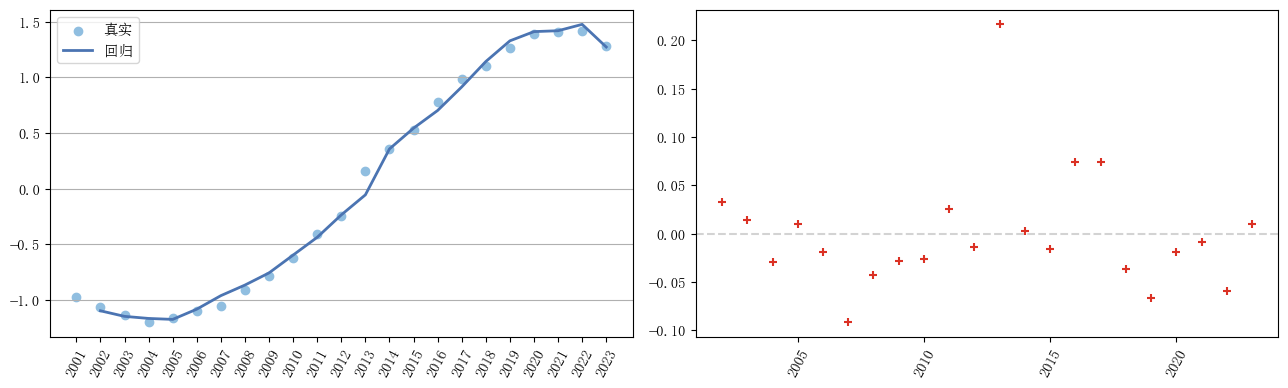

In [9]:
for i in range(9):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
    ax[0].yaxis.grid(True)
    ax[0].tick_params(axis='x', labelrotation=62)
    
    ax[0].scatter(std_df.index, std_df["population"], color=color_light_blue, label="真实")
    ax[0].plot(ols_df.index, models[i].fittedvalues, '-', linewidth=2, color=color_dark_blue, label="回归")
    # try:
    #     ax[0].plot(year_list, models[i].fittedvalues, '-', linewidth=2, color=color_dark_blue, label="回归")
    # except:
    #     ax[0].plot(std_df.index[1:], models[i].fittedvalues, '-', linewidth=2, color=color_dark_blue, label="回归")

    ax[1].axhline(y=0, color='lightgray', linestyle='--')
    ax[1].tick_params(axis='x', labelrotation=62)
    ax[1].scatter(year_list, ols_df["population"] - models[i].fittedvalues, marker='+', color=color_red)
    # try:
    #     ax[1].scatter(std_df.index, ols_df["population"] - eval(f"model{i + 1}").fittedvalues, marker='+', color=color_red)
    # except:
    #     ax[1].scatter(std_df.index[1:], ols_df["population"][1:] - eval(f"model{i + 1}").fittedvalues, marker='+', color=color_red)

    ax[0].legend(prop={"size": 10.5})
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, f"model{i + 1}.png"), dpi=600)


# 3. 预测

In [70]:
preds = []
inversed_preds = []

for setting, model in zip(settings, models):
    x = ols_df[setting].iloc[-1]

    prediction = model.get_prediction(x)
    # print(prediction.summary_frame(0.05).loc['population'])
    pred_y = pd.DataFrame(prediction.summary_frame(0.05).loc['population'])
    
    
    pred_y['urban_population_rate'] = [0 for _ in range(len(pred_y))]
    pred_y['gdp_per_capita'] = [0 for _ in range(len(pred_y))]
    pred_y['unemployment_rate'] = [0 for _ in range(len(pred_y))]
    pred_y['year'] = [0 for _ in range(len(pred_y))]

    preds.append(pd.DataFrame(pred_y['population'].drop('mean_se')).T)

    inversed_pred = pd.DataFrame(ols_scaler.inverse_transform(pred_y), columns=pred_y.columns, index=pred_y.index)
    inversed_preds.append(pd.DataFrame(inversed_pred['population'].drop('mean_se')).T)

import csv
with open(os.path.join(save_path, 'predictions.csv'), 'w', newline='') as f:
    writer = csv.writer(f)

    writer.writerow(['点估计', '均值区间估计下限', '均值区间估计上限', '可见区间估计下限', '可见区间估计上限'])
    
    for pred in preds:
        writer.writerow(pred.values[0])
    writer.writerow([])
    for pred in inversed_preds:
        writer.writerow(pred.values[0])